In [1]:
#import libraries
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn import tree
import array
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [2]:
#import data
data = pd.read_csv("data.csv")

In [3]:
#viewing first 5 records
data.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [4]:
#summary of data
data.describe()

,parents,has_nurs,form,children,housing,finance,social,health,class
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,pretentious,critical,incomplete,more,critical,inconv,slightly_prob,recommended,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


In [5]:
#features (independent)
xn = data.iloc[:, 0:8]
xn.head()

,parents,has_nurs,form,children,housing,finance,social,health
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended
1,usual,proper,complete,1,convenient,convenient,nonprob,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority


In [6]:
#outcome class (dependent)
yn = data.iloc[:, -1]
yn.head()

0    recommend
1     priority
2    not_recom
3    recommend
4     priority
Name: class, dtype: object

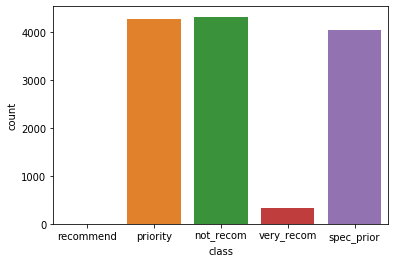

In [7]:
#visualizing the distribution outcome class count
plot_class = sns.countplot(yn)

In [8]:
#determining the frequency of these classes
yn.value_counts()

not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        2
Name: class, dtype: int64

In [9]:
#spliting train-test data
xn_train, xn_test, yn_train, yn_test = train_test_split(xn, yn, test_size = 0.3)

In [10]:
xn_train.head()

,parents,has_nurs,form,children,housing,finance,social,health
12321,great_pret,very_crit,completed,1,convenient,inconv,nonprob,recommended
7226,pretentious,critical,completed,2,critical,convenient,problematic,not_recom
11407,great_pret,critical,complete,more,convenient,inconv,slightly_prob,priority
12563,great_pret,very_crit,incomplete,1,less_conv,inconv,problematic,not_recom
8585,pretentious,very_crit,foster,3,critical,inconv,problematic,not_recom


In [11]:
pqr = xn_train

In [12]:
pqr.insert(8,'class',yn_train,True)

In [13]:
pqr.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
12321,great_pret,very_crit,completed,1,convenient,inconv,nonprob,recommended,priority
7226,pretentious,critical,completed,2,critical,convenient,problematic,not_recom,not_recom
11407,great_pret,critical,complete,more,convenient,inconv,slightly_prob,priority,spec_prior
12563,great_pret,very_crit,incomplete,1,less_conv,inconv,problematic,not_recom,not_recom
8585,pretentious,very_crit,foster,3,critical,inconv,problematic,not_recom,not_recom


In [14]:
yn_train.value_counts()

not_recom     3009
priority      2989
spec_prior    2840
very_recom     233
recommend        1
Name: class, dtype: int64

In [15]:
datan_1 = pqr[pqr['class']=='very_recom']  
datan_1.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
894,usual,less_proper,complete,1,less_conv,inconv,slightly_prob,recommended,very_recom
1326,usual,less_proper,incomplete,1,less_conv,inconv,slightly_prob,recommended,very_recom
4554,pretentious,proper,completed,1,less_conv,convenient,nonprob,recommended,very_recom
2055,usual,improper,completed,3,convenient,convenient,slightly_prob,recommended,very_recom
1245,usual,less_proper,completed,more,convenient,convenient,slightly_prob,recommended,very_recom


In [16]:
datan_2 = pqr[pqr['class']== 'recommend']
datan_2.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend


In [17]:
datan_n = pqr[pqr['class']== 'priority']
datan_n.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
12321,great_pret,very_crit,completed,1,convenient,inconv,nonprob,recommended,priority
6465,pretentious,improper,completed,more,critical,convenient,slightly_prob,recommended,priority
1578,usual,less_proper,foster,2,convenient,inconv,slightly_prob,recommended,priority
4576,pretentious,proper,completed,1,critical,convenient,slightly_prob,priority,priority
1908,usual,improper,complete,more,less_conv,convenient,nonprob,recommended,priority


In [18]:
datan_n = datan_n.append(datan_1) #appending very_reco
datan_n.tail()

,parents,has_nurs,form,children,housing,finance,social,health,class
75,usual,proper,complete,2,less_conv,convenient,slightly_prob,recommended,very_recom
1674,usual,less_proper,foster,more,convenient,convenient,nonprob,recommended,very_recom
4338,pretentious,proper,complete,1,less_conv,convenient,nonprob,recommended,very_recom
597,usual,proper,incomplete,more,convenient,convenient,slightly_prob,recommended,very_recom
1098,usual,less_proper,completed,1,less_conv,convenient,nonprob,recommended,very_recom


In [19]:
datan_n.describe()

,parents,has_nurs,form,children,housing,finance,social,health,class
count,3222,3222,3222,3222,3222,3222,3222,3222,3222
unique,3,5,4,4,3,2,3,2,2
top,usual,less_proper,complete,1,convenient,convenient,nonprob,recommended,priority
freq,1482,1028,899,949,1278,1744,1184,1897,2989


In [20]:
xn1 = datan_n.iloc[:, 0:8]
yn1 = datan_n.iloc[:, -1]

In [21]:
oversampler = RandomOverSampler()
xn1_resampled, yn1_resampled = oversampler.fit_resample(xn1, yn1)

In [22]:
data2n_final = pd.DataFrame(xn1_resampled)
data2n_final.head()

,0,1,2,3,4,5,6,7
0,great_pret,very_crit,completed,1,convenient,inconv,nonprob,recommended
1,pretentious,improper,completed,more,critical,convenient,slightly_prob,recommended
2,usual,less_proper,foster,2,convenient,inconv,slightly_prob,recommended
3,pretentious,proper,completed,1,critical,convenient,slightly_prob,priority
4,usual,improper,complete,more,less_conv,convenient,nonprob,recommended


In [23]:
data2n_final['class']=pd.DataFrame(yn1_resampled)
data2n_final.head()

,0,1,2,3,4,5,6,7,class
0,great_pret,very_crit,completed,1,convenient,inconv,nonprob,recommended,priority
1,pretentious,improper,completed,more,critical,convenient,slightly_prob,recommended,priority
2,usual,less_proper,foster,2,convenient,inconv,slightly_prob,recommended,priority
3,pretentious,proper,completed,1,critical,convenient,slightly_prob,priority,priority
4,usual,improper,complete,more,less_conv,convenient,nonprob,recommended,priority


In [24]:
data2n_final.columns=['parents','has_nurs','form','children','housing','finance','social','health','class']
data2n_final.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
0,great_pret,very_crit,completed,1,convenient,inconv,nonprob,recommended,priority
1,pretentious,improper,completed,more,critical,convenient,slightly_prob,recommended,priority
2,usual,less_proper,foster,2,convenient,inconv,slightly_prob,recommended,priority
3,pretentious,proper,completed,1,critical,convenient,slightly_prob,priority,priority
4,usual,improper,complete,more,less_conv,convenient,nonprob,recommended,priority


In [25]:
data2n = pqr[pqr['class']== 'not_recom']
data2n.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
7226,pretentious,critical,completed,2,critical,convenient,problematic,not_recom,not_recom
12563,great_pret,very_crit,incomplete,1,less_conv,inconv,problematic,not_recom,not_recom
8585,pretentious,very_crit,foster,3,critical,inconv,problematic,not_recom,not_recom
12167,great_pret,very_crit,complete,2,convenient,inconv,problematic,not_recom,not_recom
12641,great_pret,very_crit,incomplete,3,convenient,convenient,slightly_prob,not_recom,not_recom


In [26]:
data2n = data2n.append(datan_2)
data2n.describe()

,parents,has_nurs,form,children,housing,finance,social,health,class
count,3010,3010,3010,3010,3010,3010,3010,3010,3010
unique,3,5,4,4,3,2,3,2,2
top,great_pret,improper,foster,more,less_conv,inconv,slightly_prob,not_recom,not_recom
freq,1010,612,768,766,1034,1521,1009,3009,3009


In [27]:
x1n = data2n.iloc[:, 0:8]
x1n.head()

,parents,has_nurs,form,children,housing,finance,social,health
7226,pretentious,critical,completed,2,critical,convenient,problematic,not_recom
12563,great_pret,very_crit,incomplete,1,less_conv,inconv,problematic,not_recom
8585,pretentious,very_crit,foster,3,critical,inconv,problematic,not_recom
12167,great_pret,very_crit,complete,2,convenient,inconv,problematic,not_recom
12641,great_pret,very_crit,incomplete,3,convenient,convenient,slightly_prob,not_recom


In [28]:
y1n = data2n.iloc[:,-1]
y1n.head()

7226     not_recom
12563    not_recom
8585     not_recom
12167    not_recom
12641    not_recom
Name: class, dtype: object

In [29]:
x1_resampled, y1_resampled = oversampler.fit_resample(x1n, y1n)

In [30]:
data22n = pd.DataFrame(x1_resampled)
data22n.head()

,0,1,2,3,4,5,6,7
0,pretentious,critical,completed,2,critical,convenient,problematic,not_recom
1,great_pret,very_crit,incomplete,1,less_conv,inconv,problematic,not_recom
2,pretentious,very_crit,foster,3,critical,inconv,problematic,not_recom
3,great_pret,very_crit,complete,2,convenient,inconv,problematic,not_recom
4,great_pret,very_crit,incomplete,3,convenient,convenient,slightly_prob,not_recom


In [31]:
data22n['class']=pd.DataFrame(y1_resampled)
data22n.head()

,0,1,2,3,4,5,6,7,class
0,pretentious,critical,completed,2,critical,convenient,problematic,not_recom,not_recom
1,great_pret,very_crit,incomplete,1,less_conv,inconv,problematic,not_recom,not_recom
2,pretentious,very_crit,foster,3,critical,inconv,problematic,not_recom,not_recom
3,great_pret,very_crit,complete,2,convenient,inconv,problematic,not_recom,not_recom
4,great_pret,very_crit,incomplete,3,convenient,convenient,slightly_prob,not_recom,not_recom


In [32]:
data22n.columns=['parents','has_nurs','form','children','housing','finance','social','health','class']
data22n.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
0,pretentious,critical,completed,2,critical,convenient,problematic,not_recom,not_recom
1,great_pret,very_crit,incomplete,1,less_conv,inconv,problematic,not_recom,not_recom
2,pretentious,very_crit,foster,3,critical,inconv,problematic,not_recom,not_recom
3,great_pret,very_crit,complete,2,convenient,inconv,problematic,not_recom,not_recom
4,great_pret,very_crit,incomplete,3,convenient,convenient,slightly_prob,not_recom,not_recom


In [33]:
data2n_final = data2n_final.append(data22n)

In [34]:
data2n_final = data2n_final. append(pqr[pqr['class']== 'spec_prior'])

In [35]:
data2n_final.describe()

,parents,has_nurs,form,children,housing,finance,social,health,class
count,14836,14836,14836,14836,14836,14836,14836,14836,14836
unique,3,5,4,4,3,2,3,3,5
top,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,not_recom
freq,7572,5886,6218,6604,7775,9380,7422,8784,3009


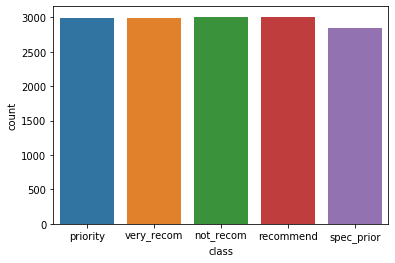

In [36]:
plot_class = sns.countplot(x="class", data= data2n_final)

In [37]:
xn_train = data2n_final.iloc[:,0:8]
xn_train.head()

,parents,has_nurs,form,children,housing,finance,social,health
0,great_pret,very_crit,completed,1,convenient,inconv,nonprob,recommended
1,pretentious,improper,completed,more,critical,convenient,slightly_prob,recommended
2,usual,less_proper,foster,2,convenient,inconv,slightly_prob,recommended
3,pretentious,proper,completed,1,critical,convenient,slightly_prob,priority
4,usual,improper,complete,more,less_conv,convenient,nonprob,recommended


In [38]:
# one-hot encoding
xn_train = pd.get_dummies(xn_train)

In [39]:
xn_train.head()

,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_complete,form_completed,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended
0,1,0,0,0,0,0,0,1,0,1,...,0,0,0,1,1,0,0,0,0,1
1,0,1,0,0,1,0,0,0,0,1,...,1,0,1,0,0,0,1,0,0,1
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3,0,1,0,0,0,0,1,0,0,1,...,1,0,1,0,0,0,1,0,1,0
4,0,0,1,0,1,0,0,0,1,0,...,0,1,1,0,1,0,0,0,0,1


In [40]:
yn_train = data2n_final.iloc[:,-1]
yn_train.head()

0    priority
1    priority
2    priority
3    priority
4    priority
Name: class, dtype: object

In [41]:
yn_train = pd.DataFrame(yn_train)
yn_train.head()

,class
0,priority
1,priority
2,priority
3,priority
4,priority


In [42]:
rep_val = {'priority':1,'spec_prior':2,'not_recom':3,'very_recom':4,'recommend':5}
yn_train['class'] = [rep_val[i] for i in yn_train['class']]

In [43]:
yn_train.head()

,class
0,1
1,1
2,1
3,1
4,1


In [44]:
xn_test = pd.get_dummies(xn_test)
xn_test.head()

,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_complete,form_completed,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended
3162,0,0,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
3354,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1228,0,0,1,0,0,1,0,0,0,1,...,1,0,1,0,0,0,1,0,1,0
10717,1,0,0,0,1,0,0,0,0,1,...,0,1,1,0,0,1,0,0,1,0
12181,1,0,0,0,0,0,0,1,1,0,...,0,1,0,1,0,0,1,0,1,0


In [45]:
yn_test

3162       priority
3354       priority
1228       priority
10717    spec_prior
12181    spec_prior
            ...    
5131       priority
2513      not_recom
426        priority
4621       priority
2084      not_recom
Name: class, Length: 3888, dtype: object

In [46]:
yn_test = pd.DataFrame(yn_test)
yn_test

,class
3162,priority
3354,priority
1228,priority
10717,spec_prior
12181,spec_prior
...,...
5131,priority
2513,not_recom
426,priority
4621,priority


In [47]:
rep_val = {'priority':1,'spec_prior':2,'not_recom':3,'very_recom':4,'recommend':5}
yn_test['class'] = [rep_val[i] for i in yn_test['class']]

In [48]:
yn_test.head()

,class
3162,1
3354,1
1228,1
10717,2
12181,2


# Decision Tree

### 1. max_depth -  how deep the tree can be

In [49]:
dt2n_training = np.tile(0., 27)
dt2n_testing = np.tile(0., 27)
print("depth | Training score    | Testing score")
for i in range (1,27):
    print(i,end="   |   ")
    dt2 = tree.DecisionTreeClassifier(max_depth=i,criterion = 'entropy')
    dt2.fit(xn_train, yn_train)
    score1 = dt2.score(xn_train,yn_train)
    dt2n_training[i] = score1.mean()
    print(round(dt2n_training[i],5), end = "         |  ")
    #dt2.fit(xnf_test, ynf_test)
    score2 = dt2.score(xn_test,yn_test)
    dt2n_testing[i] = score2.mean()
    print(round(dt2n_testing[i],5))
    

depth | Training score    | Testing score
1   |   0.40563         |  0.33745
2   |   0.58506         |  0.62809
3   |   0.6888         |  0.53755
4   |   0.77952         |  0.72685
5   |   0.84774         |  0.7482
6   |   0.902         |  0.83539
7   |   0.93246         |  0.89558
8   |   0.94864         |  0.90509
9   |   0.96293         |  0.93081
10   |   0.97809         |  0.9519
11   |   0.98996         |  0.97016
12   |   0.99542         |  0.98174
13   |   0.99885         |  0.98765
14   |   1.0         |  0.99074
15   |   1.0         |  0.99151
16   |   1.0         |  0.99074
17   |   1.0         |  0.9928
18   |   1.0         |  0.99331
19   |   1.0         |  0.99126
20   |   1.0         |  0.99151
21   |   1.0         |  0.99023
22   |   1.0         |  0.9928
23   |   1.0         |  0.99254
24   |   1.0         |  0.991
25   |   1.0         |  0.99254
26   |   1.0         |  0.9928


In [50]:
dt2n_training=dt2n_training[dt2n_training!=0.]
dt2n_testing=dt2n_testing[dt2n_testing!=0.]
xaxis2 = array.array('i',(i for i in range(1,27)))

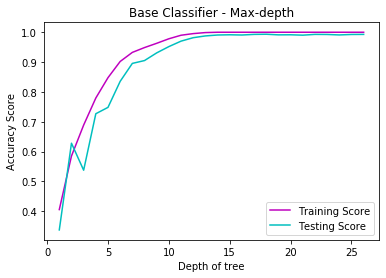

In [51]:
fig5, p5 = plt.subplots()
plt.plot(xaxis2, dt2n_training,'m-', Label='Training Score')
plt.plot(xaxis2, dt2n_testing,'c-', Label = 'Testing Score')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy Score')
plt.title('Base Classifier - Max-depth')
legend = p5.legend(loc='lower right')

Oversampling hasn't caused the model to overfit in this case. 

The model isn't overfitting thus even if bagging is applied there wont be much difference in performance. 

### 2. min_samples_split -  minimum number of samples required to split an internal node

In [52]:
min_samples_splits_vals = np.linspace(0.01, 1.0, 100, endpoint=True)

In [53]:
dt3_training = np.tile(0., 100)
dt3_testing = np.tile(0., 100)
k=0
print("min_samples | Training score    | Testing score")
for i in min_samples_splits_vals:
    print(round(i,3),end="         |   ")
    dt3 = tree.DecisionTreeClassifier(min_samples_split=i,criterion = 'entropy')
    dt3.fit(xn_train, yn_train)
    score1 = dt3.score(xn_train,yn_train)
    dt3_training[k] = score1.mean()
    print(round(dt3_training[k],5), end = "         |  ")
    score2 = dt3.score(xn_test,yn_test)
    dt3_testing[k] = score2.mean()
    print(round(dt3_testing[k],5))
    k+=1
    

min_samples | Training score    | Testing score
0.01         |   0.94662         |  0.90998
0.02         |   0.92242         |  0.87834
0.03         |   0.90867         |  0.875
0.04         |   0.90044         |  0.86265
0.05         |   0.87813         |  0.82613
0.06         |   0.87099         |  0.81121
0.07         |   0.86041         |  0.78961
0.08         |   0.8381         |  0.75746
0.09         |   0.8381         |  0.75746
0.1         |   0.83668         |  0.74794
0.11         |   0.82839         |  0.7302
0.12         |   0.79442         |  0.67464
0.13         |   0.79442         |  0.67438
0.14         |   0.79442         |  0.67464
0.15         |   0.79442         |  0.67438
0.16         |   0.79442         |  0.67438
0.17         |   0.74454         |  0.65766
0.18         |   0.74454         |  0.65792
0.19         |   0.74454         |  0.65766
0.2         |   0.74454         |  0.65766
0.21         |   0.74124         |  0.65766
0.22         |   0.73187         | 

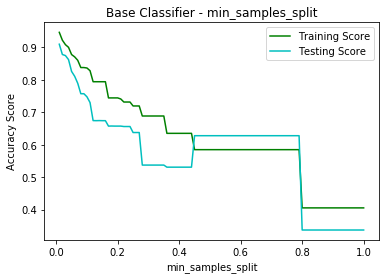

In [54]:
fig6, p6 = plt.subplots()
plt.plot(min_samples_splits_vals, dt3_training,'g-', Label='Training Score')
plt.plot(min_samples_splits_vals, dt3_testing,'c-', Label = 'Testing Score')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy Score')
plt.title('Base Classifier - min_samples_split')
legend = p6.legend(loc='upper right')


### 3. min_samples_leaf -  minimum number of samples required to be at a leaf node

In [55]:
min_samples_leafs_vals = np.linspace(0.1, 0.5, 5, True)

In [56]:
dt5_training = np.tile(0., 5)
dt5_testing = np.tile(0., 5)
k=0
print("min_samples | Training score    | Testing score")
for i in min_samples_leafs_vals:
    print(round(i,3),end="         |   ")
    dt5 = tree.DecisionTreeClassifier(min_samples_leaf=i,criterion = 'entropy')
    dt5.fit(xn_train, yn_train)
    score1 = dt5.score(xn_train,yn_train)
    dt5_training[k] = score1.mean()
    print(round(dt5_training[k],5), end = "         |  ")
    score2 = dt5.score(xn_test,yn_test)
    dt5_testing[k] = score2.mean()
    print(round(dt5_testing[k],5))
    k+=1
    

min_samples | Training score    | Testing score
0.1         |   0.71974         |  0.63786
0.2         |   0.58506         |  0.62809
0.3         |   0.40563         |  0.33745
0.4         |   0.40563         |  0.33745
0.5         |   0.20282         |  0.33719


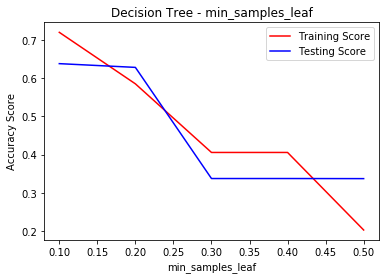

In [57]:
fig8, p8 = plt.subplots()
plt.plot(min_samples_leafs_vals, dt5_training,'r-',Label='Training Score')
plt.plot(min_samples_leafs_vals, dt5_testing,'b-',Label = 'Testing Score')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy Score')
plt.title('Decision Tree - min_samples_leaf')
legend = p8.legend(loc='upper right')


If we choose even the best values of parameters min_sample_leafs and min_sample_split we wont get accuracy as high as that obatined by tuning max_depth. Thus we won't consider these parameters while using this algorithm and for consideration in the next algorithms

#### Generating tree using depth = 10

In [58]:
dt_final = tree.DecisionTreeClassifier(max_depth = 10,criterion = 'entropy')

In [59]:
dt_final.fit(xn_train, yn_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

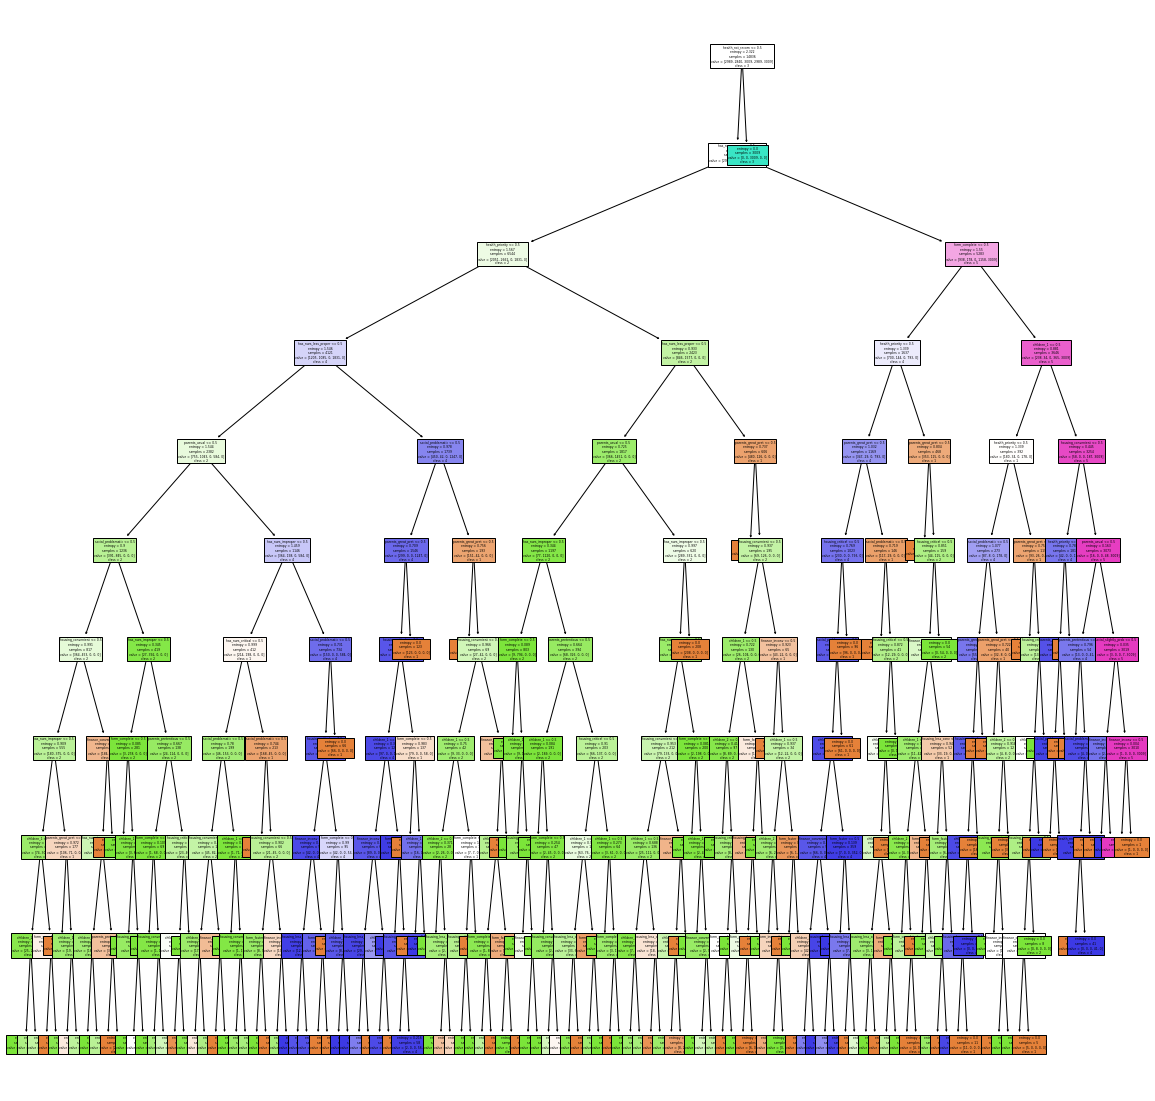

In [60]:
fig, axes = plt.subplots(figsize=(20,20))
tree.plot_tree(dt_final,
               feature_names = ['parents_great_pret', 'parents_pretentious', 'parents_usual', 'has_nurs_critical', 'has_nurs_improper', 'has_nurs_less_proper', 'has_nurs_proper', 'has_nurs_very_crit', 'form_complete', 'form_completed', 'form_foster', 'form_incomplete', 'children_1', 'children_2', 'children_3', 'children_more', 'housing_convenient', 'housing_critical', 'housing_less_conv', 'finance_convenient', 'finance_inconv', 'social_nonprob', 'social_problematic', 'social_slightly_prob', 'health_not_recom', 'health_priority', 'health_recommended'], 
               class_names=['1','2','3','4','5'],
               filled = True,fontsize = 3)
plt.show()

# Random Forest

In [61]:
train_rf = np.tile(0., 27)
test_rf = np.tile(0., 27)
print("depth | Training score    | Testing score")
for i in range(1,27):
    print(i,end="   |   ")
    model_rf = RandomForestClassifier(max_depth=i, criterion = 'entropy',n_estimators=100)
    model_rf.fit(xn_train, yn_train.values.ravel())
    score1 = model_rf.score(xn_train,yn_train)
    train_rf[i] = score1.mean()
    print(round(train_rf[i],5), end = "         |  ")
    score2 = model_rf.score(xn_test,yn_test)
    test_rf[i] = score2.mean()
    print(round(test_rf[i],5))

depth | Training score    | Testing score
1   |   0.63447         |  0.55041
2   |   0.74818         |  0.66512
3   |   0.82354         |  0.73405
4   |   0.8691         |  0.79038
5   |   0.90719         |  0.84902
6   |   0.93489         |  0.88503
7   |   0.95302         |  0.91384
8   |   0.96879         |  0.94522
9   |   0.98167         |  0.96142
10   |   0.99023         |  0.97068
11   |   0.99663         |  0.97917
12   |   0.99912         |  0.98534
13   |   0.99993         |  0.98868
14   |   1.0         |  0.99023
15   |   1.0         |  0.98894
16   |   1.0         |  0.99048
17   |   1.0         |  0.99074
18   |   1.0         |  0.99074
19   |   1.0         |  0.99126
20   |   1.0         |  0.99177
21   |   1.0         |  0.99074
22   |   1.0         |  0.99023
23   |   1.0         |  0.99074
24   |   1.0         |  0.99126
25   |   1.0         |  0.99048
26   |   1.0         |  0.99023


In [62]:
train_rf=train_rf[train_rf!=0.]
test_rf=test_rf[test_rf!=0.]
xaxis2 = array.array('i',(i for i in range(1,27)))

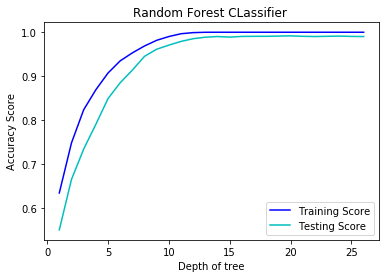

In [63]:
fig3, b3 = plt.subplots()
plt.plot(xaxis2, train_rf,'b-', Label='Training Score')
plt.plot(xaxis2, test_rf,'c-', Label = 'Testing Score')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy Score')
plt.title('Random Forest CLassifier ')
legend = b3.legend(loc='lower right')

# Comparision of Decision Tree and Random Forest

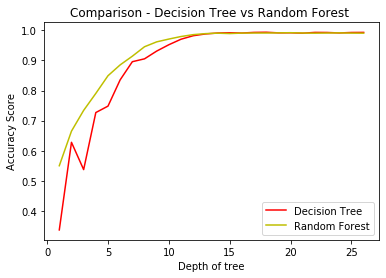

In [64]:
fig4, b4 = plt.subplots()
plt.plot(xaxis2,  dt2n_testing,'r-', Label='Decision Tree')
plt.plot(xaxis2, test_rf,'y-', Label = 'Random Forest')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy Score')
plt.title('Comparison - Decision Tree vs Random Forest ')
legend = b4.legend(loc='lower right')

As expected, except for the depth~2, base classifier (Decision Tree) is performing similiar to that of bagging techniques

# XGBoost

In [65]:
train_xgb_md = np.tile(0., 30)
test_xgb_md = np.tile(0., 30)
print("depth | Training score    | Testing score")
for i in range (1,27):
    print(i,end="   |   ")
    clf_xgb_md = xgb.XGBClassifier(n_estimators=100,max_depth=i)
    clf_xgb_md.fit(xn_train, yn_train.values.ravel())
    score1 = clf_xgb_md.score(xn_train, yn_train)
    train_xgb_md[i] = score1.mean()
    print(round(train_xgb_md[i],4), end = "         |  ")
    score2 = clf_xgb_md.score(xn_test,yn_test)
    test_xgb_md[i] = score2.mean()
    print(round(test_xgb_md[i],4))


depth | Training score    | Testing score
1   |   0.9281         |  0.8812
2   |   0.979         |  0.9619
3   |   0.9966         |  0.9949
4   |   1.0         |  0.9985
5   |   1.0         |  0.9987
6   |   1.0         |  0.9992
7   |   1.0         |  0.9992
8   |   1.0         |  0.9995
9   |   1.0         |  0.9992
10   |   1.0         |  0.9997
11   |   1.0         |  0.9987
12   |   1.0         |  0.9992
13   |   1.0         |  0.9992
14   |   1.0         |  0.9995
15   |   1.0         |  0.9992
16   |   1.0         |  0.9992
17   |   1.0         |  0.9992
18   |   1.0         |  0.9992
19   |   1.0         |  0.9992
20   |   1.0         |  0.9992
21   |   1.0         |  0.9992
22   |   1.0         |  0.9992
23   |   1.0         |  0.9992
24   |   1.0         |  0.9992
25   |   1.0         |  0.9992
26   |   1.0         |  0.9992


In [66]:
train_xgb_md=train_xgb_md[train_xgb_md!=0.]
test_xgb_md=test_xgb_md[test_xgb_md!=0.]
xaxis = array.array('i',(i for i in range(1,27)))

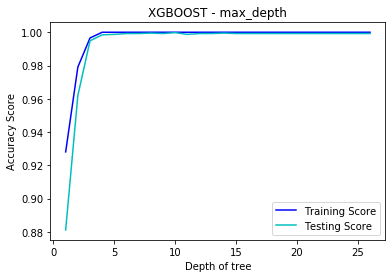

In [67]:
fig4, a4 = plt.subplots()
plt.plot(xaxis, train_xgb_md,'b-', Label='Training Score')
plt.plot(xaxis, test_xgb_md,'c-', Label = 'Testing Score')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy Score')
plt.title('XGBOOST - max_depth')
legend = a4.legend(loc='lower right')

# Comparison of Decision Tree, Random Forest and XGBoost

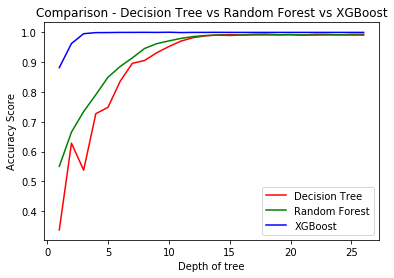

In [68]:
fig5, b5 = plt.subplots()
plt.plot(xaxis2,  dt2n_testing,'r-', Label='Decision Tree')
plt.plot(xaxis2, test_rf,'g-', Label = 'Random Forest')
plt.plot(xaxis2, test_xgb_md,'b-', Label = 'XGBoost')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy Score')
plt.title('Comparison - Decision Tree vs Random Forest vs XGBoost')
legend = b5.legend(loc='lower right')

Boosting is used when we already have strong base classifier. In this case, decision tree was already a strong classifiers. Although, all the classifiers have similar performances athigher levels of depth, XGBooost performed significantly better in comparison with the other models even at lower depth levels. 